# Handling Missing Data

## 1) Univairate
- Numerical & Categorical
- Complete Case Analysis
- Mean/ Median/ Mode
- Arbitrary Imputation - Any value that is different to existing values - 999 etc
- End of Trail Imputation - Values that lies att eh end of the curve bell curve or boxplot
- Adding Missing value to the categorical  & Numerical variable
- Random Sample Imputation to both categorical & Numerica
- Missing Indicator
## ) Multivariate
- KNN Imputer - Using KNN Machine Learing Model
- Iterative Imputer - Using MICE Algo

### Imputing Numerical Data
- Mean/ Median
- Arbitrary
- Using Random Value
- End of Tail/ Distribution

# Missing Data Imputation
### Complete Case Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'e:\\DataScienceAdvanced\\FeatureEngineering'

In [3]:
data = pd.read_csv(".\data\houseprice.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Lets find out total number of nulls
data.isna().sum().sum()

6965

In [7]:
# Lets find out total number of nulls in each columns
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
col_nulls = data.isna().sum()

In [9]:
# Columns with nulls 
col_nulls[col_nulls!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Getting the percentage of missing values
vars_with_na = [var for var in data.columns if data[var].isnull().mean()>0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
var_col = []
for var in data.columns:
    if data[var].isnull().mean()>0:
        var_col.append(var)

In [12]:
var_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
data['Fence'].isnull().mean()

0.8075342465753425

In [14]:
# Finding out percentage of missing values in each columns
data_na = data[vars_with_na].isnull().mean()
print(data_na)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


In [15]:
# Transform array into dataframe
data_na = pd.DataFrame(data_na.reset_index())


# Adding columns names
data_na.columns = ['variables','na_percentage']

# Order the dataframe according to na percentage
data_na.sort_values(by = 'na_percentage', ascending = False, inplace = True)

data_na

,variables,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [16]:
# We will do complete case analysis only for columns where missing data is only 
# less than 5% of all observations 
# We will remove the columns where missing data is more than 85 - 95%
# No rule of thumb here  if column is important then we should reachout to the 
# business to provide not missing data

### In CCA -  Analysis that only includes participants for which we have no missing data

In [17]:
# We will do complete case analysis only for columns where data is missing only less than 5% of all observations
# We will remove the columns where missing data is more than 5%
# We will have a dataframe where either we have all data or data missing is less than 5%

In [18]:
# Using list comprehension
var_cca = [var for var in data.columns if data[var].isnull().mean()<0.05 ]

In [19]:
var_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [20]:
print(len(var_cca))

70


In [21]:
# Calculate % of observations with complete case analysis that is have values in all columns
# We will do that in all columns that we just got above
# # method drop na discards the observations that contain na in any row or columns

data[var_cca].dropna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
# Number of rows after droping na
len(data[var_cca].dropna())

1412

In [23]:
# calculate % of observations  with complete cases i.e values in all columns
# method drop na discards the observations that contain na in any row or columns
len(data[var_cca].dropna())

1412

In [24]:
# Total number of rows
len(data)

1460

In [25]:
# Percentage of not null rows or complete cases
len(data[var_cca].dropna())/len(data)

0.9671232876712329

In [26]:
# Create a complete case dataset
# Remove observations that has na in any variable

data_cca = data[var_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

In [27]:
data_cca.isnull().sum().sum()

0

In [28]:
data_cca.select_dtypes("number").columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
len(data_cca.select_dtypes("number").columns)

36

In [30]:
data_cca.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
len(data_cca.select_dtypes("object").columns)

34

In [32]:
data_cca.select_dtypes("datetime").columns

Index([], dtype='object')

In [33]:
#data_cca.select_dtypes("object").hist(bins = 50, density = True,figsize =(14,14))

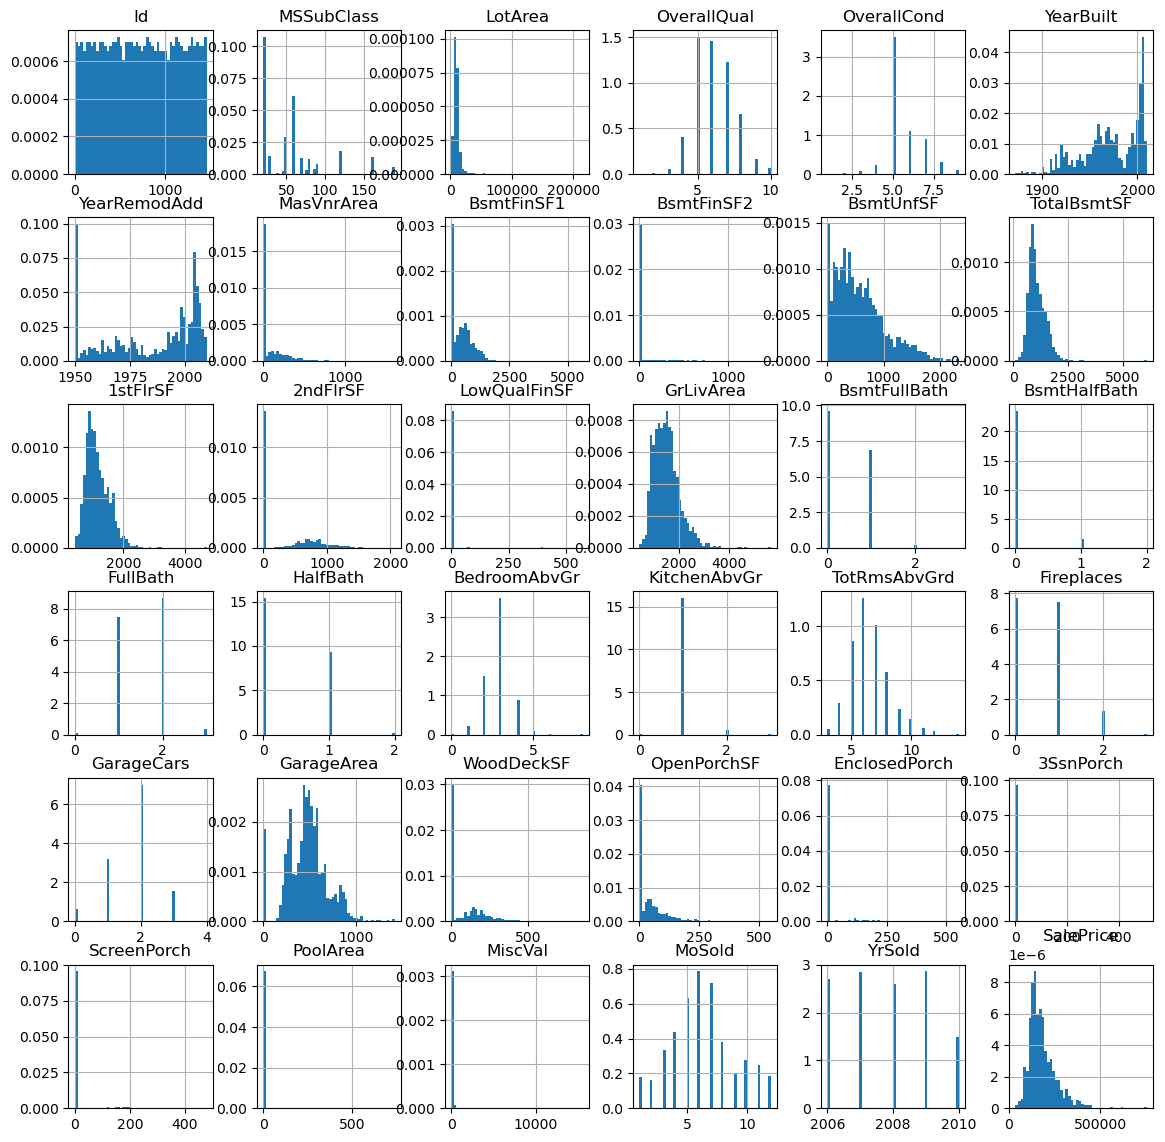

In [34]:
import matplotlib.pyplot as plt
# ploting hitogram for al the numerical variables in the complete case dataset
data_cca.hist(bins = 50, density = True,figsize =(14,14))
plt.show()

<Axes: >

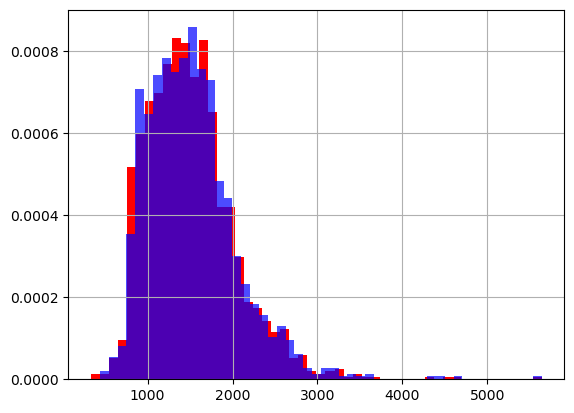

In [35]:
# Looking at the distribution of few important variables before and after drop
# GrLivArea didn't have any null values but at the time CCA we have to remove nulls from other cols few rows
# also got deleted from this col
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].hist(bins = 50, ax = ax, density = True, color = 'red')
data_cca['GrLivArea'].hist(bins = 50, ax = ax, density = True, color = 'blue', alpha = 0.7)
# NOt much difference in the distriution of the data

<Axes: ylabel='Density'>

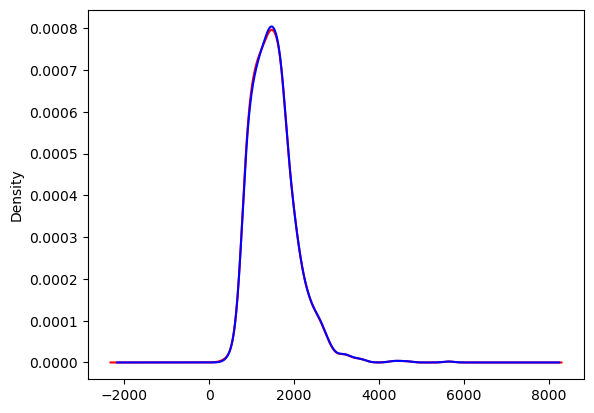

In [36]:
# density plot
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].plot.density(color = 'red')
data_cca['GrLivArea'].plot.density(color = 'blue')
# Distribution is almost identical

<Axes: >

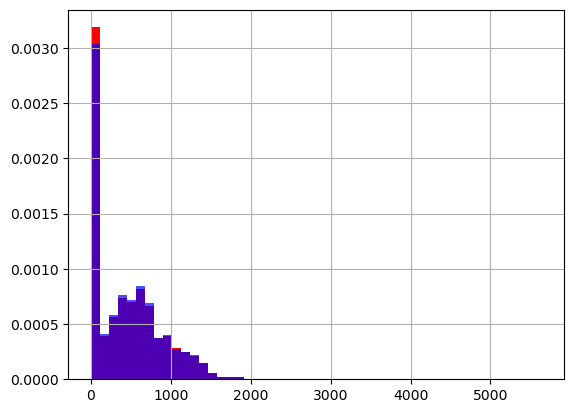

In [37]:
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['BsmtFinSF1'].hist(bins = 50, ax = ax, density = True, color = 'red')
data_cca['BsmtFinSF1'].hist(bins = 50, ax = ax, density = True, color = 'blue', alpha = 0.7)

<Axes: ylabel='Density'>

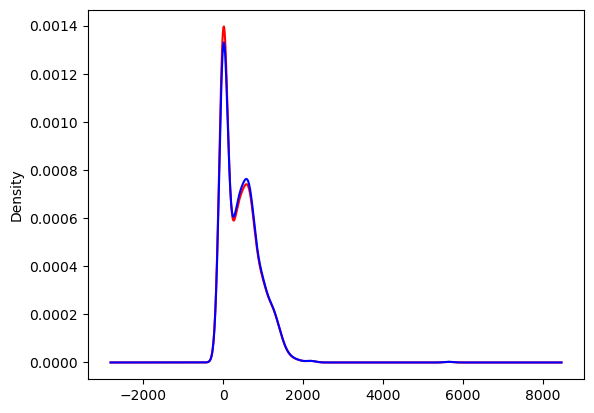

In [38]:
# density plot
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['BsmtFinSF1'].plot.density(color = 'red')
data_cca['BsmtFinSF1'].plot.density(color = 'blue')
# Distribution is almost identical

<Axes: ylabel='Frequency'>

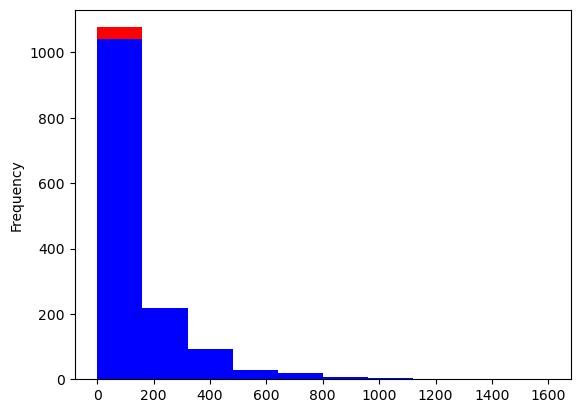

In [39]:

# density plot
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['MasVnrArea'].plot.hist(color = 'red')
data_cca['MasVnrArea'].plot.hist(color = 'blue')
# Distribution is almost identical

In [40]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
data.select_dtypes(exclude = ['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
 list(data.select_dtypes('number').columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [44]:
 list(data.select_dtypes('object').columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
# Looking at teh categorical variables for CCA

In [46]:
# the following function captures the percentage of observations for each category in the original & complete case dataset
# put them together in a new dataframe


In [47]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
    [
        # percentage of observations per category, original data
        df[variable].value_counts()/len(df),
    # percentage of observations per category, cca data
        df_cca[variable].value_counts()/len(df_cca)
    ],
    axis = 1
    )
    
    # add column names
    tmp.columns = ['original', 'cca']
    
    return(tmp)

In [48]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [49]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [50]:
data_cca['MasVnrType'].value_counts()

None       831
BrkFace    438
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [52]:
categorical_distribution(data, data_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [53]:
categorical_distribution(data, data_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


# Mean & Median Imputation

In [54]:
data = pd.read_csv(".\\data\\titanic.csv",usecols=['age', 'fare','survived'])

In [55]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [56]:
data.isna().sum().sum()

264

In [57]:
# percentage of nas
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

**Imputation - Remember**
- Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [58]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [59]:
X_train.shape,X_test.shape

((916, 2), (393, 2))

In [60]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()


age     0.191048
fare    0.000000
dtype: float64

In [61]:
# let's make a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na


def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [62]:
# calculate the median Age

median = X_train.age.median()
median

28.0

In [63]:
# calculate the mean Age

mean = X_train.age.mean()
mean

30.23144399460189

In [64]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace with the median
X_train['age_median'] = impute_na(X_train, 'age', median)

# now replace with the mean
X_train['age_mean'] = impute_na(X_train, 'age', mean)

# the mean contains many decimals, so I round to 1
# using the round function from numpy
X_train['age_mean'] = np.round(X_train['age_mean'], 1)

X_train.head(15)

,age,fare,age_median,age_mean
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,28.0,30.2
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,28.0,30.2
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


In [65]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%
# As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.



print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['age_median'].var())
print('Variance after mean imputation: ', X_train['age_mean'].var())

Original variable variance:  194.16304666581854
Variance after median imputation:  157.7984295760209
Variance after mean imputation:  157.02170735199397


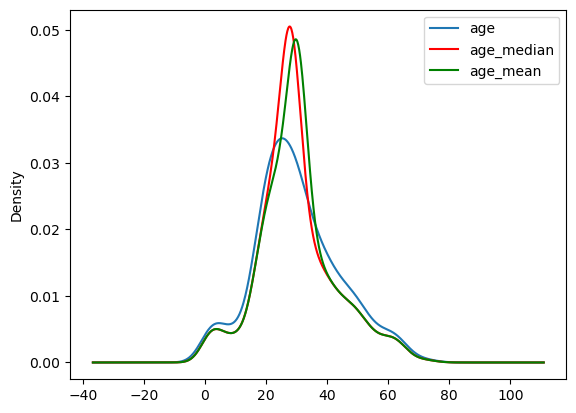

In [66]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or mean

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

Is this important?

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [67]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'age_median', 'age_mean']].cov()
#We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

,fare,age,age_median,age_mean
fare,2248.326729,136.176223,114.961682,110.198311
age,136.176223,194.163047,194.163047,194.159033
age_median,114.961682,194.163047,157.798430,157.035694
age_mean,110.198311,194.159033,157.035694,157.021707


<Axes: >

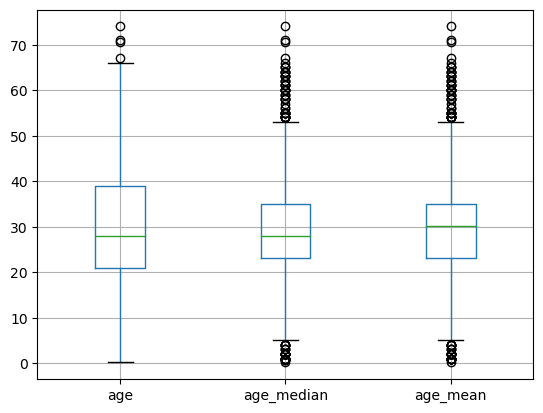

In [68]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers
#   “maximum”: Q3 + 1.5*IQR
#   “minimum”: Q1 -1.5*IQR

# Let's find out using a boxplot
X_train[['age', 'age_median', 'age_mean']].boxplot()

From the boxplot above, we can see that after the imputation not only we have more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.

Is this important?

If we are after true outliers, we need to keep this behaviour in mind, to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that is happening.

In [69]:
# For more examples refer notebook Preprocessing.ipynb

# Simple Imputer By SKLEARN

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [71]:
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [72]:
# let's load the House Prices dataset

data = pd.read_csv(".\data\houseprice.csv", usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [73]:
# let's check the null values
data.isnull().mean().sort_values(ascending=False)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
OverallQual    0.000000
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [74]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [75]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [76]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with a constant
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

In [77]:
# we can look at the learnt imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [78]:

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [79]:
# we can transform it back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


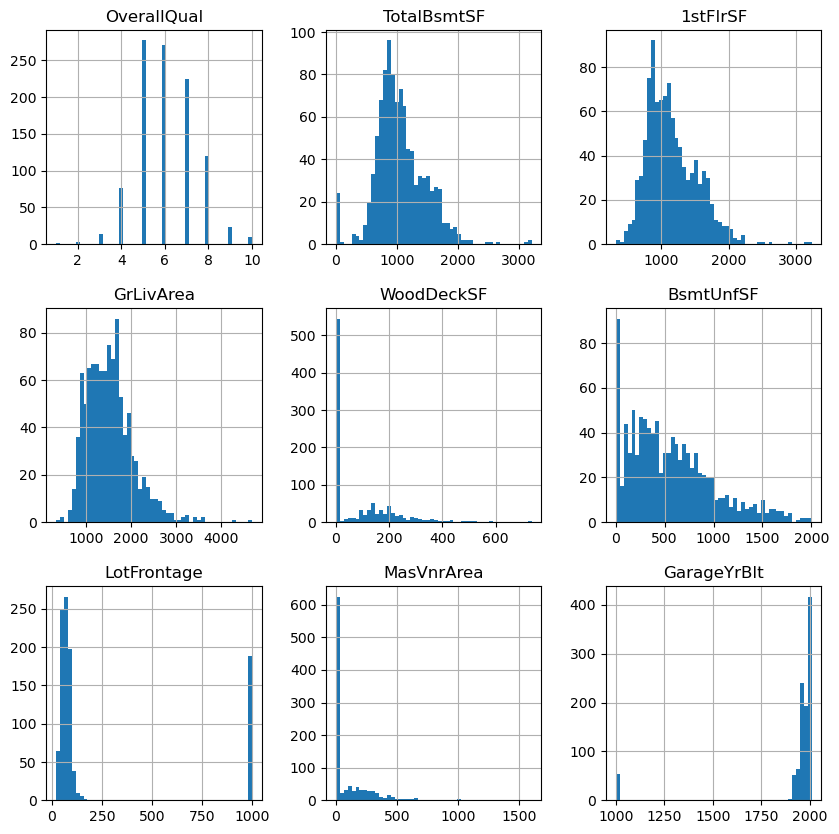

In [80]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the tall bar at 999 in the LotFrontage's histogram, which appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

Remember to be cautious with the order in which you pass the column names as we discussed in the previous notebook.

SimpleImputer: different procedures on different features On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer.

Note ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the Sklearn website

In [81]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [82]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

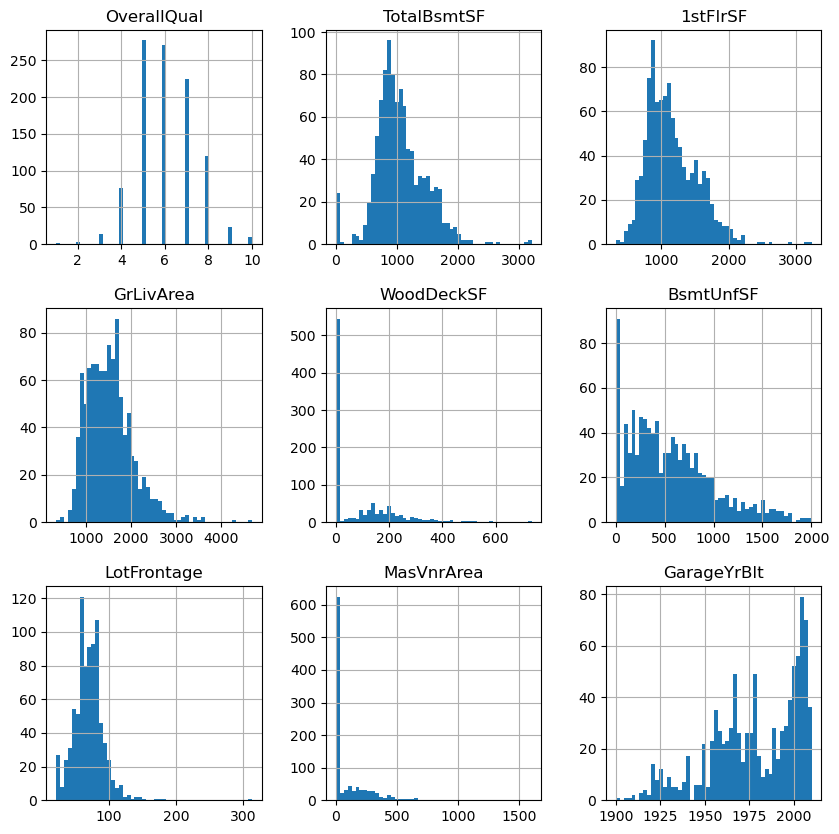

In [83]:

# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [84]:
# first we need to make lists, indicating which features
# will be imputed with each value

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# then we put the features list and the transformers together
# using the column transformer

# in this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will
# be retained, and the rest dropped

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', SimpleImputer(
        strategy='constant', fill_value=999), features_LotFrontAge),
    ('imputer_MasVnrArea', SimpleImputer(
        strategy='constant', fill_value=-10), features_MasVnrArea),
    ('imputer_GarageYrBlt', SimpleImputer(
        strategy='constant', fill_value=1700), features_GarageYrBlt)
], remainder='drop')

# End of Trail or Distribution Imputation

- If data is normally distributed impute by outliers- Mean + 3*std or Mean - 3*std
- If data is skewed then we use IQR approximty rule Q1 - 1.5R or Q3 + 1.5R

- IQR = Q3-Q1
- Q1 - 25th percentile
- Q3 - 75th percentil
- Is used when data is missing not at random

In [85]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('imputer_LotFrontAge',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 SimpleImputer(fill_value=-10,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('imputer_GarageYrBlt',
                                 SimpleImputer(fill_value=1700,
                                               strategy='constant'),
                                 ['GarageYrBlt'])])

In [86]:
# we can explore the transformers like this:

preprocessor.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

In [87]:
# and we can look at the parameters learnt like this:

# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].statistics_

array([999.])

In [88]:

# for MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].statistics_

array([-10.])

In [89]:
# for GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].statistics_

array([1700.])

In [90]:
!python.__Version__

'python.__Version__' is not recognized as an internal or external command,
operable program or batch file.


In [91]:
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [92]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

ANOTHER NOTE OF CAUTION

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

ColumnTransformer first creates 3 single column dataframes, one with each of the indicated variables The SimpleImputers learn the parameters in their respective sliced dataframes In this case they don't learn anything, because we hard code the arbitrary value ColunmnTransformer contatenates back the 3 single column dataframes into the final result, which is a 3 column dataframe So note that you will not get all the variables from the original X_train, unless you create imputers for all the variables!!

Also, there is a risk of messing up with the order of the features, if we do not use the transformers within a pipeline or we do not keep an eye on the order of the features in the train set, before they were converted to numpy arrays.

In [93]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


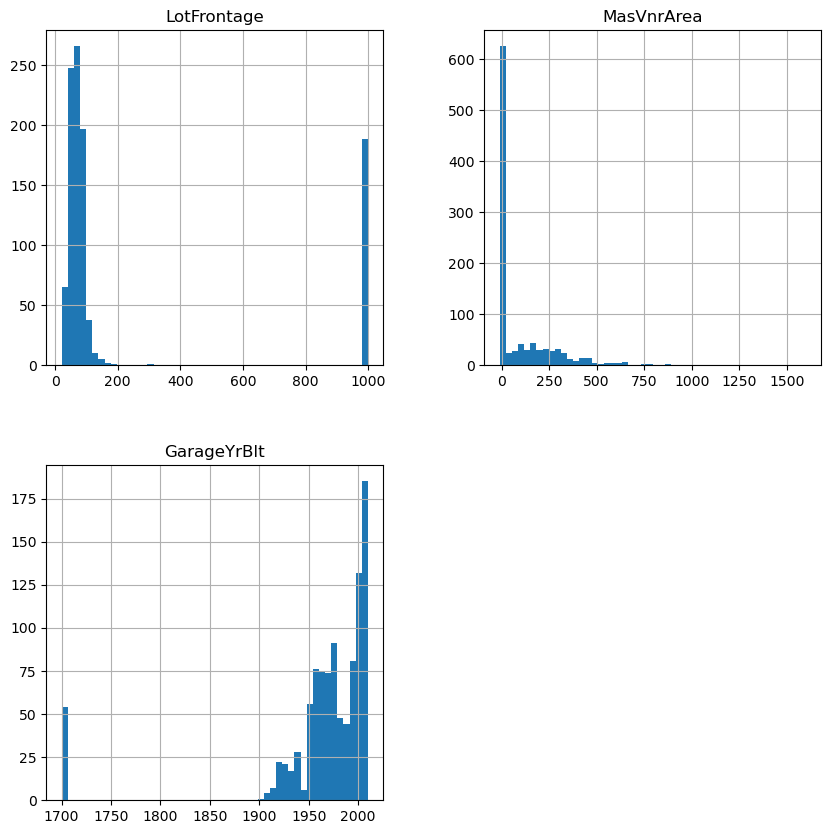

In [94]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

# Frequent category imputation with Scikit-learn ==> SimpleImputer

- If missing values are more than 10% in any categorical column then we create new category with the name of missing
& we don't impute it with most frequent category

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [96]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

In [97]:
data = pd.read_csv(".\data\houseprice.csv", usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [98]:
# let's check the null values
data.isnull().mean().sort_values(ascending=False)

Alley          0.937671
FireplaceQu    0.472603
LotFrontage    0.177397
BsmtQual       0.025342
MasVnrArea     0.005479
MSZoning       0.000000
Street         0.000000
BsmtUnfSF      0.000000
SalePrice      0.000000
dtype: float64

In [99]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [100]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

BsmtQual
Axes(0.125,0.11;0.775x0.77)


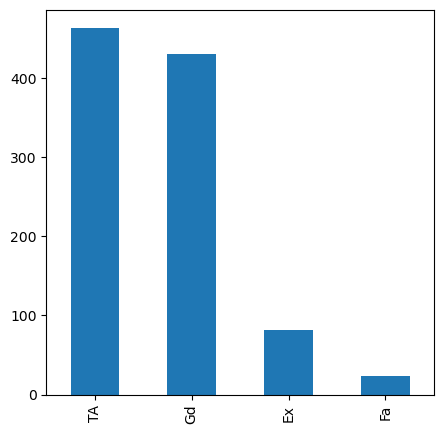


FireplaceQu
Axes(0.125,0.11;0.775x0.77)


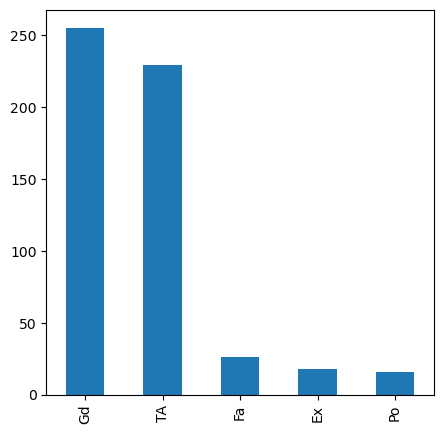


MSZoning
Axes(0.125,0.11;0.775x0.77)


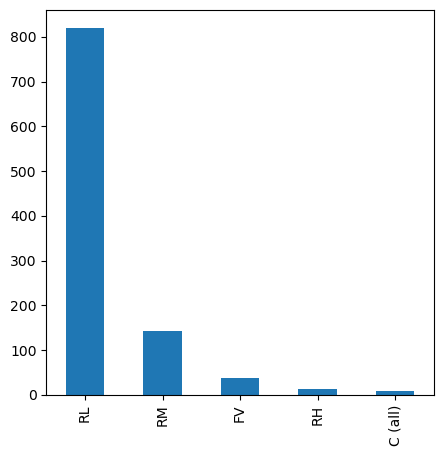


Street
Axes(0.125,0.11;0.775x0.77)


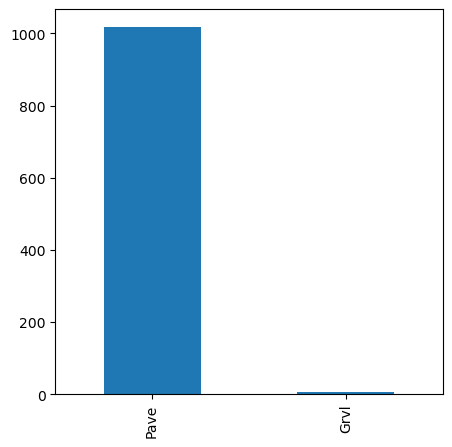


Alley
Axes(0.125,0.11;0.775x0.77)


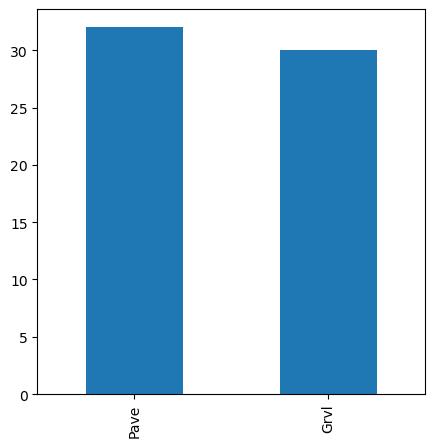

In [101]:
for col in X_train.select_dtypes(include='object'):
    print(col)
    plt.figure(figsize=(5,5))
    print(X_train[col].value_counts().plot(kind = "bar"))
    plt.show()
    print()

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 64 to 684
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BsmtQual     998 non-null    object 
 1   FireplaceQu  544 non-null    object 
 2   MSZoning     1022 non-null   object 
 3   BsmtUnfSF    1022 non-null   int64  
 4   LotFrontage  833 non-null    float64
 5   MasVnrArea   1017 non-null   float64
 6   Street       1022 non-null   object 
 7   Alley        62 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.9+ KB


# SimpleImputer on the entire dataset


In [103]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables
# categorical or not
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='most_frequent')

In [104]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

In [105]:
for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts())
    print()

BsmtQual
TA    463
Gd    430
Ex     82
Fa     23
Name: BsmtQual, dtype: int64

FireplaceQu
Gd    255
TA    229
Fa     26
Ex     18
Po     16
Name: FireplaceQu, dtype: int64

MSZoning
RL         819
RM         142
FV          38
RH          14
C (all)      9
Name: MSZoning, dtype: int64

BsmtUnfSF
0       78
600      7
728      7
625      6
440      6
        ..
1276     1
1470     1
1048     1
831      1
1195     1
Name: BsmtUnfSF, Length: 627, dtype: int64

LotFrontage
60.0     94
80.0     56
50.0     41
75.0     36
70.0     36
         ..
118.0     1
141.0     1
103.0     1
150.0     1
140.0     1
Name: LotFrontage, Length: 101, dtype: int64

MasVnrArea
0.0      608
16.0       7
108.0      6
106.0      6
320.0      5
        ... 
116.0      1
34.0       1
234.0      1
296.0      1
30.0       1
Name: MasVnrArea, Length: 261, dtype: int64

Street
Pave    1017
Grvl       5
Name: Street, dtype: int64

Alley
Pave    32
Grvl    30
Name: Alley, dtype: int64



In [106]:
# and we can investigate the frequent values to corroborate
# the imputer did a good job
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [107]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [108]:
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60.0,573.0,Pave,Pave
1,Gd,Gd,RL,288,60.0,0.0,Pave,Pave
2,TA,Gd,RL,162,50.0,0.0,Pave,Pave
3,TA,Gd,RL,356,60.0,0.0,Pave,Pave
4,TA,Gd,RL,0,60.0,0.0,Pave,Pave


# SimpleImputer: different procedures on different feature

In [109]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [110]:
# let's look at the missing values
X_train.isnull().mean().sort_values(ascending=False)

Alley          0.939335
FireplaceQu    0.467710
LotFrontage    0.184932
BsmtQual       0.023483
MasVnrArea     0.004892
MSZoning       0.000000
BsmtUnfSF      0.000000
Street         0.000000
dtype: float64

## For this demo, I will impute:

## categorical variables with the frequent category numerical variables with the mean.

In [111]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputr', SimpleImputer(strategy='mean'), features_numeric),
    ('categoric_imputr', SimpleImputer(strategy='most_frequent'), features_categoric)
])

In [112]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric_imputr', SimpleImputer(),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputr',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual', 'FireplaceQu', 'MSZoning',
                                  'Street', 'Alley'])])

In [113]:
# we can explore the transformers like this:

preprocessor.transformers

[('numeric_imputr',
  SimpleImputer(),
  ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputr',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])]

In [114]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['numeric_imputr'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [115]:
# and we can corroborate the value with that one in
# the train set
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [116]:
# for frequent category imputer

preprocessor.named_transformers_['categoric_imputr'].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [117]:
# and we corroborate those values in the train set

X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [118]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [119]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_numeric + features_categoric).head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318.0,69.668667,573.0,Gd,Gd,RL,Pave,Pave
1,288.0,69.668667,0.0,Gd,Gd,RL,Pave,Pave
2,162.0,50.0,0.0,TA,Gd,RL,Pave,Pave
3,356.0,60.0,0.0,TA,Gd,RL,Pave,Pave
4,0.0,60.0,0.0,TA,Gd,RL,Pave,Pave


# Imputting with the Missing keyword

In [120]:
cols_to_use = ['FireplaceQu', 'MasVnrArea','GarageQual','SalePrice']

In [121]:
data = pd.read_csv(".\data\houseprice.csv", usecols=cols_to_use)

In [122]:
data.head()

,MasVnrArea,FireplaceQu,GarageQual,SalePrice
0,196.0,NaN,TA,208500
1,0.0,TA,TA,181500
2,162.0,TA,TA,223500
3,0.0,Gd,TA,140000
4,350.0,TA,TA,250000


In [123]:
cols_to_use.remove('SalePrice')

In [124]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [125]:
X_train.head()

,FireplaceQu,MasVnrArea,GarageQual
64,NaN,573.0,TA
682,Gd,0.0,TA
960,NaN,0.0,NaN
1384,NaN,0.0,TA
1100,NaN,0.0,TA


FireplaceQu
Axes(0.125,0.11;0.775x0.77)


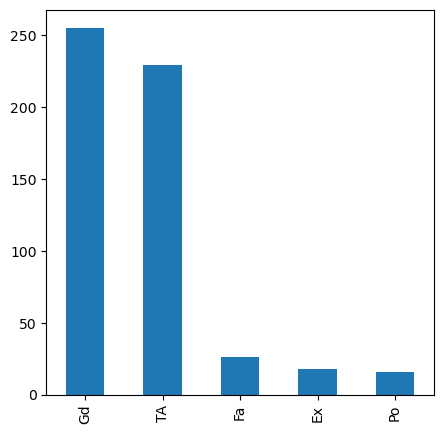


GarageQual
Axes(0.125,0.11;0.775x0.77)


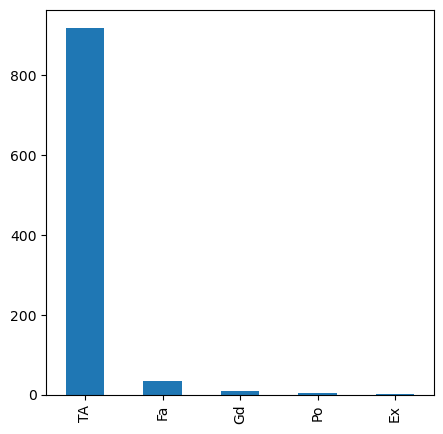

In [126]:
for col in X_train.select_dtypes(include='object'):
    print(col)
    plt.figure(figsize=(5,5))
    print(X_train[col].value_counts().plot(kind = "bar"))
    plt.show()
    print()

In [127]:
X_train["GarageQual"].value_counts()

TA    919
Fa     35
Gd      9
Po      3
Ex      2
Name: GarageQual, dtype: int64

In [128]:
X_train["GarageQual"].isnull().mean()

0.05283757338551859

In [129]:
X_train["FireplaceQu"].value_counts()

Gd    255
TA    229
Fa     26
Ex     18
Po     16
Name: FireplaceQu, dtype: int64

In [130]:
X_train["FireplaceQu"].isnull().mean()

0.46771037181996084

In [131]:
X_train["FireplaceQu"].fillna('Missing', inplace = True)

FireplaceQu
Axes(0.125,0.11;0.775x0.77)


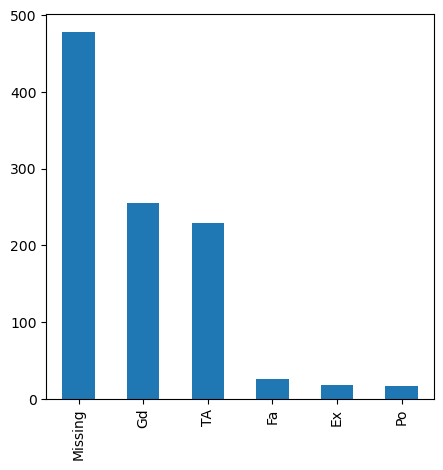


GarageQual
Axes(0.125,0.11;0.775x0.77)


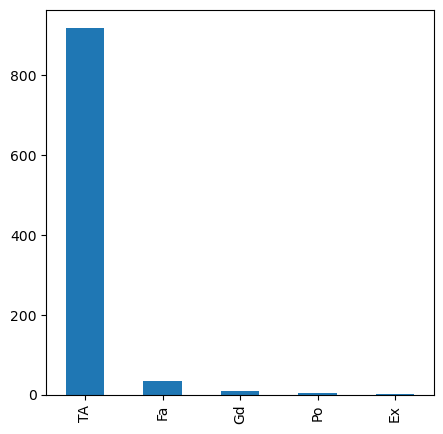

In [132]:
for col in X_train.select_dtypes(include='object'):
    print(col)
    plt.figure(figsize=(5,5))
    print(X_train[col].value_counts().plot(kind = "bar"))
    plt.show()
    print()

In [133]:
# We willuse sklearn to impute GarageQual col with keywork missing

In [134]:
X_train.isnull().sum()

FireplaceQu     0
MasVnrArea      5
GarageQual     54
dtype: int64

In [135]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [136]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [137]:
imputer.statistics_

array(['Missing', 'Missing', 'Missing'], dtype=object)

In [138]:
X_train

array([['Missing', 573.0, 'TA'],
       ['Gd', 0.0, 'TA'],
       ['Missing', 0.0, 'Missing'],
       ...,
       ['Missing', 0.0, 'TA'],
       ['TA', 18.0, 'TA'],
       ['Missing', 30.0, 'TA']], dtype=object)

In [139]:
X_train = pd.DataFrame(X_train,
             columns=cols_to_use).head()

In [140]:
X_train

,FireplaceQu,MasVnrArea,GarageQual
0,Missing,573.0,TA
1,Gd,0.0,TA
2,Missing,0.0,Missing
3,Missing,0.0,TA
4,Missing,0.0,TA


FireplaceQu
Axes(0.125,0.11;0.775x0.77)


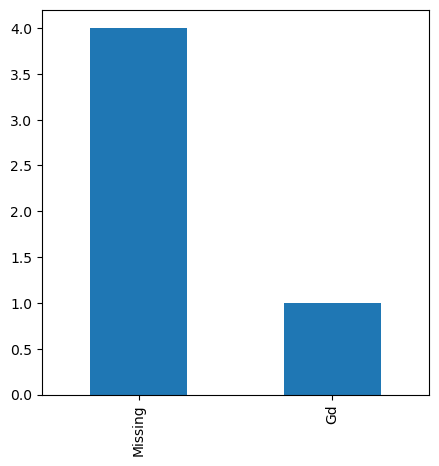


MasVnrArea
Axes(0.125,0.11;0.775x0.77)


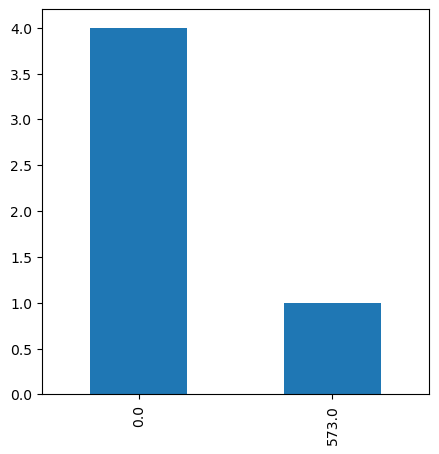


GarageQual
Axes(0.125,0.11;0.775x0.77)


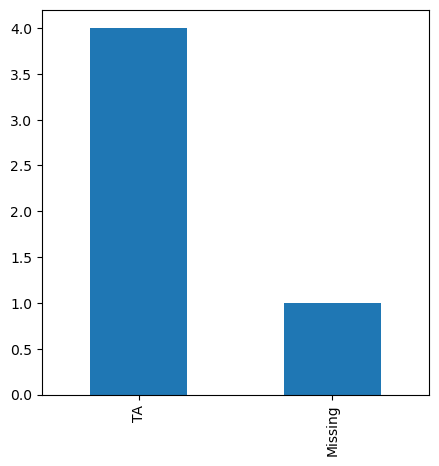

In [141]:
for col in X_train.select_dtypes(include='object'):
    print(col)
    plt.figure(figsize=(5,5))
    print(X_train[col].value_counts().plot(kind = "bar"))
    plt.show()
    print()

In [142]:
for col in X_train.select_dtypes(include='object'):
    print(col)

    print(X_train[col].value_counts())
    plt.show()
    print()

FireplaceQu
Missing    4
Gd         1
Name: FireplaceQu, dtype: int64

MasVnrArea
0.0      4
573.0    1
Name: MasVnrArea, dtype: int64

GarageQual
TA         4
Missing    1
Name: GarageQual, dtype: int64



## Univariate
### Covered so far :
- CCA
- Numerical Data
- Categorical Data
### Now we will cover 
- Random Value
- Mising Indicator
- Automatic 
## Multivariate
- KNN Imputer
- Iterative

### Random Value - For nulls, the values are selected randomly from the column 
- Can be applied to both numeric & categorical data
- Easy to implement
- Not available in Sklearn
- shape of Distribution & Variance stay intact
- Not good for tree based algos
- Covariance with other variables are also get disturbed because of randomness
- Its memory heavy for deployment as we need to store the original training set to extract values from & replace the NA in coming observations
- Well suited for Linear models but not for treebased

In [143]:
data = pd.read_csv(".\\data\\titanic.csv",usecols=['age', 'fare','survived'])

In [144]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [145]:
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [146]:

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [147]:
X_train["age_imputed"] = X_train["age"]
X_test["age_imputed"] = X_test["age"]


In [148]:
X_train.isnull().mean()

age            0.191048
fare           0.000000
age_imputed    0.191048
dtype: float64

In [149]:
X_train["age_imputed"][X_train["age_imputed"].isnull()]

1193   NaN
971    NaN
1284   NaN
1027   NaN
1023   NaN
        ..
705    NaN
277    NaN
1033   NaN
835    NaN
1216   NaN
Name: age_imputed, Length: 175, dtype: float64

In [150]:
X_train["age_imputed"][X_train["age_imputed"].isnull()]=X_train["age"].dropna().sample(X_train["age"].isnull().sum()).values

In [151]:
X_test["age_imputed"][X_test["age_imputed"].isnull()]=X_train["age"].dropna().sample(X_test["age"].isnull().sum()).values

In [152]:
X_train["age"].isnull().sum()

175

In [153]:
X_train["age"].dropna().sample(X_train["age"].isnull().sum()).values

array([21.  , 50.  , 18.  ,  5.  ,  2.  ,  0.75,  9.  , 10.  , 31.  ,
       30.5 , 37.  , 49.  , 35.  , 43.  , 19.  , 51.  , 18.  ,  5.  ,
       22.5 , 28.  , 46.  , 32.  , 28.  , 27.  , 29.  , 28.  , 20.  ,
       24.  , 31.  , 39.  , 35.  , 36.5 , 24.  , 53.  , 18.  , 54.  ,
       19.  , 18.  , 17.  , 36.  , 18.  , 45.  , 39.  , 58.  , 34.  ,
       14.  , 16.  , 25.  , 48.  , 29.  , 26.  , 49.  , 35.  , 33.  ,
       67.  , 23.  ,  2.  , 47.  , 21.  , 22.  , 30.  ,  3.  , 25.  ,
       24.  , 16.  , 31.  , 30.  ,  9.  , 28.  , 22.  , 22.  , 25.  ,
       33.  , 18.  , 38.  , 41.  , 19.  , 47.  , 32.  , 45.  , 66.  ,
       48.  , 31.  , 15.  , 19.  , 65.  , 23.  , 27.  , 30.  , 36.  ,
       18.  , 22.  ,  2.  , 27.  , 18.  , 17.  , 59.  , 61.  , 54.  ,
       20.  , 43.  , 23.  , 42.  , 27.  , 30.  , 24.  , 58.  , 22.  ,
       27.  , 36.  , 30.  , 60.  ,  6.  ,  3.  , 40.  , 28.  , 25.  ,
        4.  , 26.  , 61.  , 34.  , 20.  , 18.  , 45.  , 26.  , 40.5 ,
       62.  , 22.  ,

In [154]:
len(X_train["age"].dropna().sample(X_train["age"].isnull().sum()).values)

175

In [155]:
X_train.isnull().mean()

age            0.191048
fare           0.000000
age_imputed    0.000000
dtype: float64

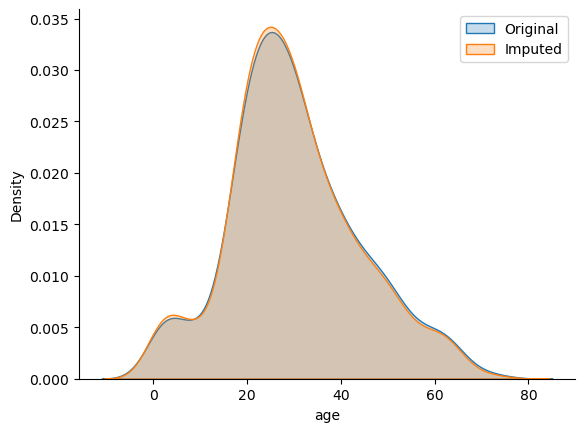

In [156]:
sns.kdeplot(X_train["age"], label="Original",fill=True)
sns.kdeplot(X_train["age_imputed"], label="Imputed",fill=True)
sns.despine()
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\1842150407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["age"], label="Original")
C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\1842150407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["age_imputed"], label="Imput

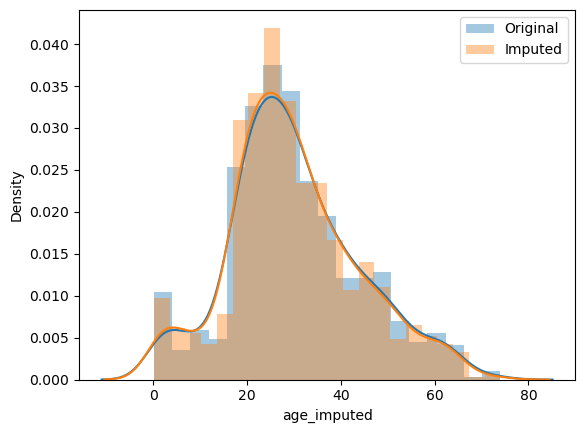

In [157]:
sns.distplot(X_train["age"], label="Original")
sns.distplot(X_train["age_imputed"], label="Imputed")
plt.legend()
plt.show()

In [158]:
print("Original Variable Variance: ", X_train["age"].var())
print("Imputed Variable Variance: ", X_train["age_imputed"].var())
# Not much difference

Original Variable Variance:  194.16304666581854
Imputed Variable Variance:  190.34625153893916


In [159]:
X_train.columns

Index(['age', 'fare', 'age_imputed'], dtype='object')

In [160]:
X_train[['age', 'fare', 'age_imputed']].cov()

,age,fare,age_imputed
age,194.163047,136.176223,194.163047
fare,136.176223,2248.326729,121.360086
age_imputed,194.163047,121.360086,190.346252


<Axes: >

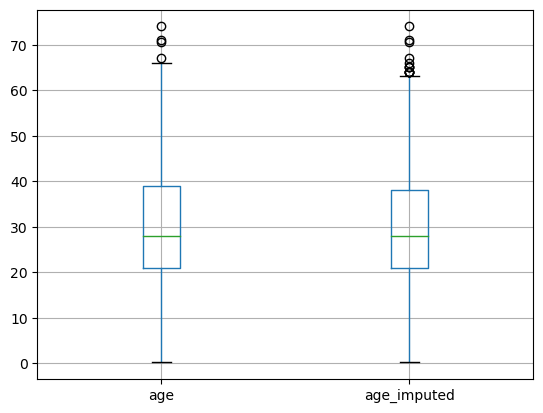

In [161]:
X_train[["age","age_imputed"]].boxplot()

In [162]:
# To make sure that we get same random value for wrt to anther variable Fare in this case

In [163]:
# For same fare we will get same random value
# current observation - value 
## sampled_value = X_train["age"].dropna().sample(1,random_state=int(observation["fare"]))

In [164]:
sampled_value = X_train["age"].dropna().sample(1,random_state=int(23.000))
sampled_value

534    19.0
Name: age, dtype: float64

In [165]:
X_train

,age,fare,age_imputed
501,13.0000,19.5000,13.0000
588,4.0000,23.0000,4.0000
402,30.0000,13.8583,30.0000
1193,NaN,7.7250,30.0000
686,22.0000,7.7250,22.0000
...,...,...,...
763,0.1667,20.5750,0.1667
835,NaN,8.0500,35.0000
1216,NaN,7.7333,25.0000
559,20.0000,36.7500,20.0000


In [166]:
sampled_value = X_train["age"].dropna().sample(1,random_state=int(30.000))
sampled_value

35    45.0
Name: age, dtype: float64

In [167]:
sampled_value = X_train["age"].dropna().sample(1,random_state=int(23.000))
sampled_value

534    19.0
Name: age, dtype: float64

### Categorical

In [168]:
cols_to_use = ["GarageQual","FireplaceQu","SalePrice"]

In [169]:
data = pd.read_csv(".\data\houseprice.csv", usecols=cols_to_use)

In [170]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [171]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [172]:
# let's separate into training and testing set
#cols_to_use.remove("SalePrice")
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [173]:
X_train.head()

,GarageQual,FireplaceQu,SalePrice
64,TA,NaN,219500
682,TA,Gd,173000
960,NaN,NaN,116500
1384,TA,NaN,105000
1100,TA,NaN,60000


In [174]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

In [175]:
X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]

In [176]:
X_train.head()

,GarageQual,FireplaceQu,SalePrice,GarageQual_imputed,FireplaceQu_imputed
64,TA,NaN,219500,TA,NaN
682,TA,Gd,173000,TA,Gd
960,NaN,NaN,116500,NaN,NaN
1384,TA,NaN,105000,TA,NaN
1100,TA,NaN,60000,TA,NaN


In [177]:
X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()]=X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()]=X_train["GarageQual"].dropna().sample(X_test["GarageQual"].isnull().sum()).values

X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()]=X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu"].isnull().sum()).values
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()]=X_train["FireplaceQu"].dropna().sample(X_test["FireplaceQu"].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\2354037950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()]=X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\2354037950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()]=X_train["GarageQual"].dropna().sample(X_test["GarageQual"].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\2354037950.py:4: SettingWithCopyWarning: 
A val

In [178]:
X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values

array(['TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

In [179]:
X_train["GarageQual"].isnull().sum()

54

In [180]:
X_train["GarageQual"].dropna().sample(10)

57      TA
343     TA
1433    TA
21      TA
67      TA
600     TA
1154    TA
940     TA
766     TA
358     TA
Name: GarageQual, dtype: object

In [181]:
# Finding out the frequency of categories before & after imputation

In [182]:
temp = pd.concat(
        [
            X_train["GarageQual"].value_counts()/len(X_train["GarageQual"].dropna()),
            X_train["GarageQual_imputed"].value_counts()/len(X_train)
            
        ], axis = 1
)
temp.columns = ["original","imputed"]

In [183]:
temp

,original,imputed
TA,0.949380,0.950098
Fa,0.036157,0.034247
Gd,0.009298,0.009785
Po,0.003099,0.003914
Ex,0.002066,0.001957


In [184]:
X_train["GarageQual"].value_counts()

TA    919
Fa     35
Gd      9
Po      3
Ex      2
Name: GarageQual, dtype: int64

In [185]:
X_train.shape

(1022, 5)

In [186]:
919+35+9+3+2

968

In [187]:
X_train["GarageQual"].isnull().sum()

54

In [188]:
919+35+9+3+2+54

1022

In [189]:
len(X_train["GarageQual"].dropna())

968

In [190]:
X_train["GarageQual_imputed"].value_counts()

TA    971
Fa     35
Gd     10
Po      4
Ex      2
Name: GarageQual_imputed, dtype: int64

In [191]:
len(X_train)

1022

In [192]:
temp = pd.concat(
        [
            X_train["FireplaceQu"].value_counts()/len(X_train["FireplaceQu"].dropna()),
            X_train["FireplaceQu_imputed"].value_counts()/len(X_train)
            
        ], axis = 1
)
temp.columns = ["original","imputed"]

In [193]:
temp

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.047945
Ex,0.033088,0.031311
Po,0.029412,0.030333


In [194]:
# If this distribution is more then this imputation method is not that great 
# Since in FireplaceQu lot of data is missing & we can't use random sample imputation as we saw below that distribution
# is changed & hence linear model will not perform well if we use random sample imputation is this column

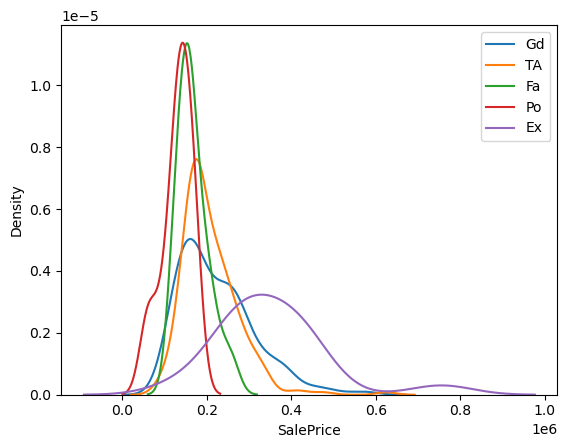

In [195]:
for category in X_train["FireplaceQu"].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu"]==category]["SalePrice"],  label = category)
plt.legend()
plt.show()

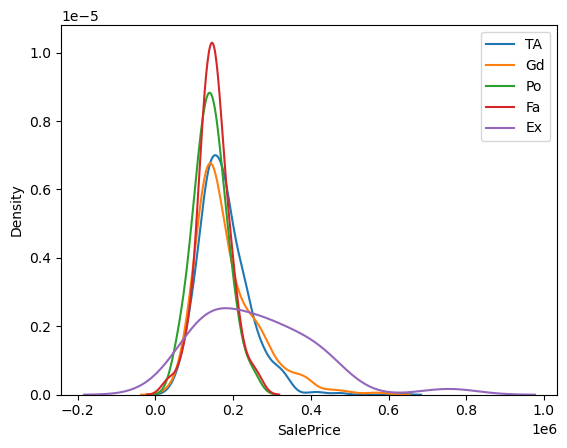

In [196]:
for category in X_train["FireplaceQu_imputed"].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu_imputed"]==category]["SalePrice"],  label = category)
    plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\1453016809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train["FireplaceQu"]==category]["SalePrice"], hist=False, label = category)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\1453016809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

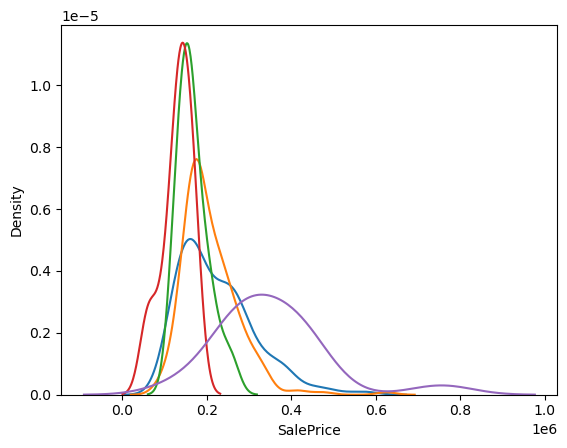

In [197]:
for category in X_train["FireplaceQu"].dropna().unique():
    sns.distplot(X_train[X_train["FireplaceQu"]==category]["SalePrice"], hist=False, label = category)

## Missing Indicator
- We create a new column with missing value indicator true or false

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator, SimpleImputer

In [65]:
data = pd.read_csv(".\\data\\titanic.csv",usecols=['age', 'fare','survived'])

In [66]:
data.isnull().sum()

survived      0
age         263
fare          1
dtype: int64

In [67]:
data[data["fare"].isnull()]

,survived,age,fare
1225,0,60.5,NaN


In [68]:
data_ind = data[data["fare"].isnull()].index

In [69]:
data.drop(data_ind, inplace=True)

In [70]:
data.isnull().sum()

survived      0
age         263
fare          0
dtype: int64

In [71]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [72]:
X = data.drop(columns=["survived"])
y = data['survived']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [128]:
X_train.shape

(915, 2)

In [129]:
X_train.head()

,age,fare
990,29.0,7.925
1151,NaN,14.500
1058,29.0,7.925
372,29.0,26.000
831,40.0,46.900


In [130]:
X_train.isnull().sum()

age     191
fare      0
dtype: int64

In [131]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [132]:
# Building quick logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf,y_train)
y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6539440203562341

In [133]:
# This time we will using Missing Indicator volumn uisng sklearn

In [134]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [135]:
mi.features_

array([0], dtype=int64)

In [136]:
X_train_missing = mi.transform(X_train)

In [137]:
X_train_missing

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [138]:
X_test_missing = mi.transform(X_test)

In [139]:
X_train["Age_NA"] = X_train_missing
X_test["Age_NA"] = X_test_missing

In [140]:
X_train

,age,fare,Age_NA
990,29.0,7.9250,False
1151,NaN,14.5000,True
1058,29.0,7.9250,False
372,29.0,26.0000,False
831,40.0,46.9000,False
...,...,...,...
715,29.0,8.0500,False
905,32.0,7.8542,False
1096,2.0,21.0750,False
235,NaN,39.6000,True


In [141]:
si = SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [142]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf2, y_train)
y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6590330788804071

In [143]:
# Simple Imputer has a parameter - add_indicator for this purporse

In [144]:
si = SimpleImputer(add_indicator=True)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [145]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf2, y_train)
y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6590330788804071

# Automatic Select Values
- Using GridSearch

In [149]:
data = pd.read_csv(".\\data\\train_demo.csv")

In [150]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [153]:
data.drop(columns=["PassengerId","Name","Ticket","Cabin"], inplace=True)

In [154]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [155]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [156]:
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [158]:
X_train.shape

(623, 7)

In [159]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
114,3,female,17.0,0,0,14.4583,C
874,2,female,28.0,1,0,24.0000,C
76,3,male,NaN,0,0,7.8958,S
876,3,male,20.0,0,0,9.8458,S
674,2,male,NaN,0,0,0.0000,S


In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 114 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    object 
 2   Age       496 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  622 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 38.9+ KB


In [161]:
# Numeric Cols - Age & Fare - impute median & then standard scaler
# Categorical Cols - Embarked & Sex - Most_frequen & then OneHotEncoding

In [183]:
numerical_features = ["Age","Fare"]
numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
    
])

categorical_features = ["Embarked","Sex"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",OneHotEncoder(handle_unknown="ignore"))
    
])

In [184]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [185]:
clf = Pipeline(steps = [
    ("preprocessor",preprocessor),
    ("classifier",LogisticRegression())
])

In [186]:
from sklearn import set_config

set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [187]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [188]:
param_grid = {
    "preprocessor__num__imputer__strategy":["mean","media"],
    "preprocessor__cat__imputer__strategy":["most_frequent","constant"],
    "classifier__C":[0.1,1.0,10,100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

- **cv** - Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data

In [190]:
grid_search.fit(X_train, y_train)

print(f"Best Params:")
print(grid_search.best_params_)

Best Params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\anacon

In [191]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.795


In [194]:
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv = df_cv.sort_values("mean_test_score", ascending=False)


In [195]:
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.005400,4.898138e-04,0.002100,3.000658e-04,1.0,most_frequent,mean,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
6,0.005647,4.512670e-04,0.002300,4.581465e-04,1.0,constant,mean,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
8,0.005800,3.999234e-04,0.002400,4.900280e-04,10,most_frequent,mean,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
10,0.006300,4.581724e-04,0.002000,3.198721e-07,10,constant,mean,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
12,0.005700,4.586515e-04,0.002100,2.998121e-04,100,most_frequent,mean,"{'classifier__C': 100, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
14,0.005900,5.384332e-04,0.002300,4.583232e-04,100,constant,mean,"{'classifier__C': 100, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.794675,0.048391,1
0,0.005800,6.000920e-04,0.002284,4.366458e-04,0.1,most_frequent,mean,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.793088,0.047079,7
2,0.005508,5.037119e-04,0.002101,3.041136e-04,0.1,constant,mean,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.714286,0.746032,...,0.774194,0.887097,0.774194,0.822581,0.806452,0.822581,0.758065,0.793088,0.047079,7
1,0.000899,2.997053e-04,0.000000,0.000000e+00,0.1,most_frequent,media,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.001006,4.483172e-04,0.000000,0.000000e+00,0.1,constant,media,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [199]:
df_cv2 = df_cv[["param_classifier__C","param_preprocessor__cat__imputer__strategy","param_preprocessor__num__imputer__strategy","mean_test_score"]]
df_cv2

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.794675
6,1.0,constant,mean,0.794675
8,10,most_frequent,mean,0.794675
10,10,constant,mean,0.794675
12,100,most_frequent,mean,0.794675
14,100,constant,mean,0.794675
0,0.1,most_frequent,mean,0.793088
2,0.1,constant,mean,0.793088
1,0.1,most_frequent,media,NaN
3,0.1,constant,media,NaN
